<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Third_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # import library to read data into dataframe
#pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

## Data Input

In [2]:
url = '/content/drive/MyDrive/DA/Churn_Modelling.csv'
df = pd.read_csv(url)
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
duplicate_check = df.drop_duplicates()
duplicate_check.shape

(10000, 14)

In [7]:
df2 = df.dropna()
df2.shape

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<Axes: >

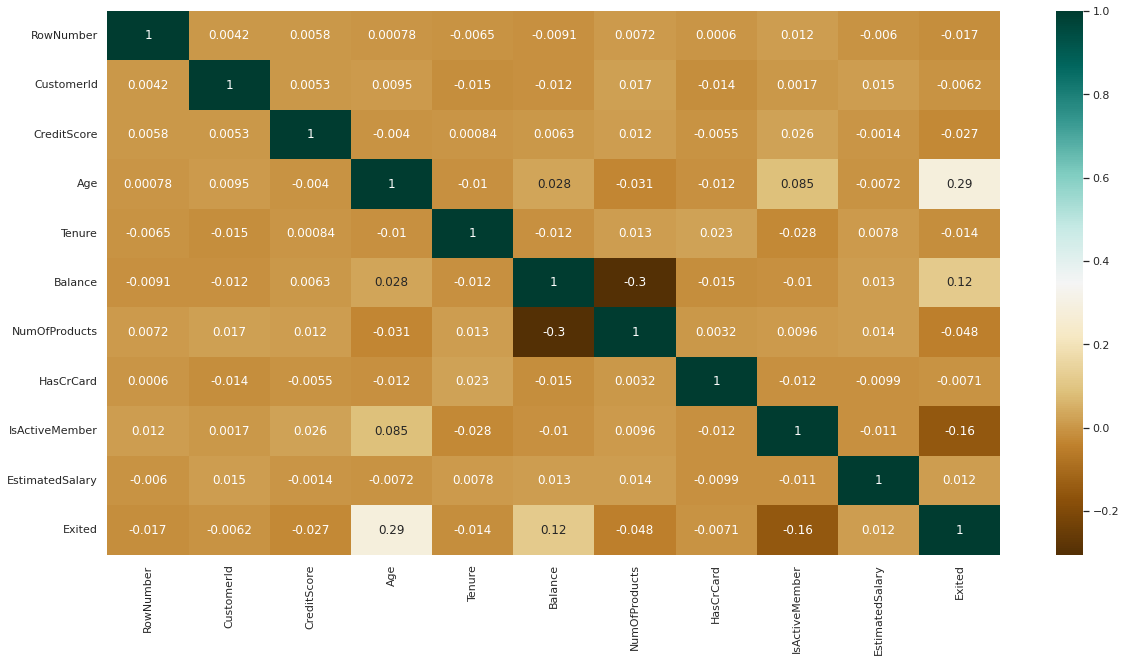

In [9]:
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c , cmap="BrBG", annot=True)

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

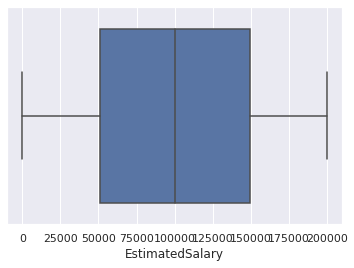

In [10]:
sns.boxplot(x=df['EstimatedSalary'])

df['EstimatedSalary'].describe()

In [11]:
# calculating total balance in france, germany and spain

total_france = df.Balance[df.Geography == 'France'].sum()
total_germany = df.Balance[df.Geography == 'Germany'].sum()
total_spain = df.Balance[df.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)


Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


<Axes: xlabel='IsActiveMember'>

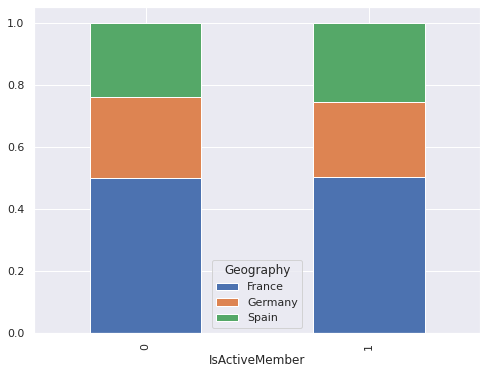

In [12]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(df['IsActiveMember'], df['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (8, 6))

In [13]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

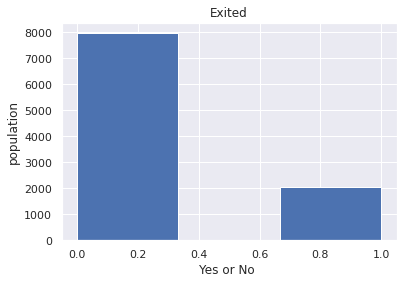

In [15]:
# How many active member does the bank have ?

plt.hist(x = df.Exited, bins = 3)
plt.title('Exited')
plt.xlabel('Yes or No ')
plt.ylabel('population')
plt.show()

## Data prep

In [16]:
# Removing the unnecassary features from the dataset

data = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [17]:
data = data[['Exited','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# replacing values
data['Gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)

data['Geography'].replace(['France', 'Spain', 'Germany'],
                        [0, 1, 2], inplace=True)

# converting 'Weight' from float to int
data['EstimatedSalary'] = data['EstimatedSalary'].astype(int)
data['Balance'] = data['Balance'].astype(int)
data['Geography'] = data['Geography'].astype(int)
data['Gender'] = data['Gender'].astype(int)


data.dtypes

Exited             int64
CreditScore        int64
Geography          int64
Gender             int64
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
dtype: object

In [18]:
# Train and Test data

# split the data into train and test set

# Shuffle dataframe using sample function
data = data.sample(frac=1)

# Select ratio
ratio = 0.80
 
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = data[0:train_size]
test = data[train_size:]

In [19]:
train.shape

(8000, 11)

In [20]:
train

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1070,1,686,2,0,47,5,170935,1,1,0,173179
3862,0,653,1,0,36,3,0,2,0,0,110525
2178,0,774,1,0,43,1,116360,1,1,0,17004
2033,0,665,1,1,41,8,0,2,1,0,132152
3145,1,482,2,0,48,2,69329,1,0,0,102640
...,...,...,...,...,...,...,...,...,...,...,...
6819,0,568,1,1,39,5,0,2,1,1,129569
4860,0,748,1,1,36,4,141573,1,1,0,82158
8899,0,584,0,0,41,3,0,2,1,1,160095
8368,1,622,2,0,34,7,98675,1,1,0,138906


In [21]:
test.shape

(2000, 11)

In [22]:
X = train.iloc[:,1:11]

#standardize the values in each column
X = (X-X.mean())/X.std()
X= X.to_numpy()

In [23]:
y = train.iloc[:,0]
y = y.to_numpy()

In [24]:
test

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5779,1,684,1,1,40,2,70291,1,1,1,115468
8688,1,637,2,1,40,9,154309,1,1,1,125334
8977,0,631,1,0,31,2,88161,2,1,0,127630
7549,1,705,2,0,44,10,106731,1,1,0,137419
4412,0,666,0,0,40,2,0,2,0,0,36371
...,...,...,...,...,...,...,...,...,...,...,...
2142,0,690,0,1,35,6,112689,1,1,0,176962
8711,0,516,1,0,65,9,102541,1,1,0,181490
913,0,756,2,1,27,1,131899,1,1,0,93302
6232,1,725,2,0,47,1,104887,1,0,0,86622


In [25]:
X1 = test.iloc[:,1:11]
#standardize the values in each column
X1 = (X1-X1.mean())/X.std()
X1= X1.to_numpy()

In [26]:
y1 = test.iloc[:,0]
y1 = y1.to_numpy()

## Mult - Variate Logistic regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:

def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis = 1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis = 0)

def indices_to_one_hot(data, nb_Classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_Classes)[targets]


def sigmoid(H):
  return 1 / (1 + np.exp(-H))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [29]:
class MVLogisticRegressioin():

  def fit(self, X, y, eta= 1e-3 , epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape

    #we need to understand what our classes are 
    K = len(np.unique(y))

    y_values = np.unique(y, return_index = False)
    Y = indices_to_one_hot(y, K).astype(int)

    #Initialize W,B
    self.B = np.random.randn(N,K)
    self.W = np.random.randn(D,K)


    J = np.zeros(epochs)

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)
      #weights and Bias update rules

      self.W -= eta*(1/N)*X.T@(P_hat- Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y , axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return sigmoid(X@self.W+ self.B)


  def predict(self ,  X): #for nlp probability is the best way to go
    return np.argmax(self.__forward__(X), axis=1)




In [30]:
multlogreg = MVLogisticRegressioin()


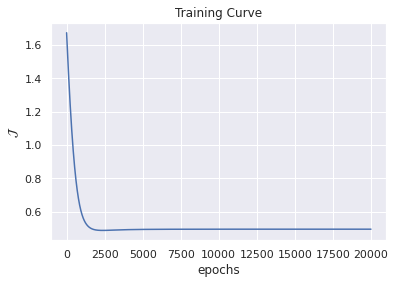

In [31]:
multlogreg.fit(X,y,epochs=2e4,eta=1e-2, show_curve=True) #eta is learnig rate

In [32]:
y_hat = multlogreg.predict(X)

In [33]:
accuracy(y, y_hat)

0.800625

## Shallow ANN or Multi-layer perceptron

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [36]:
#activation function
def linear(H):
  return H

#activation function ReLU, return linear for positive and zero for negative values
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1 / (1 + np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH / eH.sum(axis=1, keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

def accuracy(y, y_hat):
  return np.mean(y==y_hat) 

def cross_entropy(Y, P_hat):
  return -np.sum(Y * np.log(P_hat))

In [37]:
class Shallow_ANN():

  def fit(self, X, Y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(Y)
    N, D = X.shape
    K = Y.shape[1]
    # Weights and Bias initialization
    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons], [neurons,K]), 1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
    #define activations
    self.a = {1: np.tanh, 2: sigmoid}

    J = np.zeros(epochs)
    # GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y, self.Z[2])

      #Weights and Biases update rules
      #for layer 2 (Output)
      self.W[2] -= eta * (1 / N) * self.Z[1].T @ (self.Z[2] - Y)
      self.B[2] -= eta * (1 / N) * (self.Z[2] - Y).sum(axis=0)
      # For layer 1
      self.W[1] -= eta * (1 / N) * X.T @ ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2))
      self.B[1] -= eta * (1 / N) * ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z = {0: X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1] @ self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [38]:
my_ann = Shallow_ANN()  

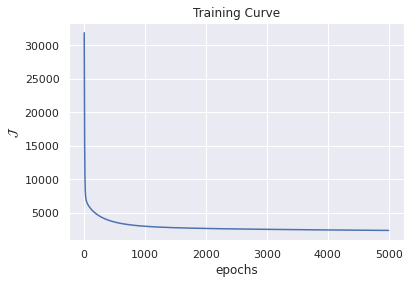

In [48]:
my_ann.fit(X,y, neurons=100, eta = 1e-1, epochs=5e3, show_curve=True)

In [49]:
  y_hat =my_ann.predict(X)

  print (f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

Training Accuracy: 0.8814
